In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import us  # Import the us library

from causallearn.search.ConstraintBased.PC import pc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
)
from sklearn.preprocessing import StandardScaler


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
depression = pd.read_csv("Student Depression Dataset.csv")
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


In [6]:
depression.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [8]:
depression.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [10]:
depression

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,5-6 hours,Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,Less than 5 hours,Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,5-6 hours,Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,Less than 5 hours,Healthy,Class 12,Yes,10.0,5.0,No,1


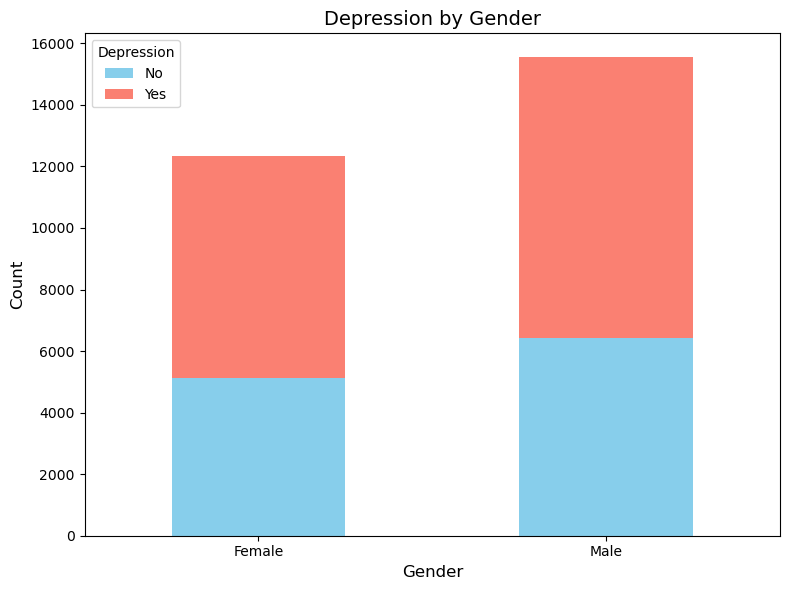

In [14]:
# Count occurrences of depression by gender
depression_counts = depression.groupby(['Gender', 'Depression']).size().unstack(fill_value=0)

# Plot the bar graph
depression_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'salmon'])
plt.title('Depression by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [20]:
depression_counts


Depression,0,1
Gender,,
Female,5133,7221
Male,6432,9115


In [21]:
depression_counts.sum(axis=1)

Gender
Female    12354
Male      15547
dtype: int64

In [3]:
depression = depression.dropna()

In [4]:
data_encoded_2 = pd.get_dummies(depression, drop_first=True)
data_encoded_2

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,False,False,False,False,False,True,False,False,False,True
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,False,False,True,False,False,False,False,False,False,False
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,False,False,False,False,False,False,False,False,True,False


In [4]:
data_graph = depression.drop(['Degree', 'Profession', 'City'], axis=1)

In [5]:
depression = depression.dropna()
data_encoded = pd.get_dummies(depression, drop_first=True)
data_encoded

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,...,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,...,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,...,False,False,False,False,False,False,False,False,True,True
4,32,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,27.0,5.0,0.0,5.75,5.0,0.0,7.0,1.0,0,...,False,False,False,False,False,False,False,False,True,True
27897,140686,27.0,2.0,0.0,9.40,3.0,0.0,0.0,3.0,0,...,False,False,False,False,False,True,False,False,False,True
27898,140689,31.0,3.0,0.0,6.61,4.0,0.0,12.0,2.0,0,...,False,False,True,False,False,False,False,False,False,False
27899,140690,18.0,5.0,0.0,6.88,2.0,0.0,10.0,5.0,1,...,False,False,False,False,False,False,False,False,True,False


Done with a PC algorithm
In general;
- suicidal thoughts appear to be directly related to age + financial stress
- seems like the algorithm has found that a lot of things affect age(as a parent) even though we know that age is independent
-- includes academic pressure, work/study hours, financial stress
- unhealthy dietary habits and family history of mental illness related to gender(male)
- sleep was a bit related to diet habits but not too much

Causal graph of relating to Depression:
- Age, Financial Stress, Sleep Duration, Dietary Habits, Sucidal thoughts, and family history all seem to be direct factors for depression
- depression can go out to affect Academic Pressure, CGPA, Study Satisfaction/Work Hours
- and Age is soemthing that seems to affect those as well

Do we ask?
Are some factors (e.g., financial stress or sleep duration) stronger predictors of depression than others?
With the common sense we have, we can see that it would be more likely that age affects work/study hours, stress more than the other way around, what seems to be the work around?
- are we doing it wrong, Why might the PC algorithm link age to variables like academic pressure and work/study hours? Could this be due to data limitations or a spurious correlation in the dataset?

Are there feedback loops where depression worsens factors like CGPA, which then loop back to increase depression?


surescreening, lasso

figure out a cutoff of interest for the variables